# Статистический анализ датасета для машинного обучения модели рекомендательной системы 
# (Statistic analysis of dataset for machine learning model recommendation system)

**Описание задачи**
1. Эксплоративный анализ датасета
2. Выявление статистической взаимосвязи между переменными
3. Расчет t-критерия для всех переменных

In [1]:
# standart library block
import numpy as np
import pandas as pd
import io
import os
import requests
import seaborn as sns
import statistics
from scipy import stats as sts
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
%matplotlib inline

# learning library block
import statsmodels.formula.api as sm

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score, roc_curve, f1_score, precision_score, recall_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from catboost import CatBoostClassifier
from catboost.datasets import amazon
from catboost.datasets import epsilon

In [2]:
# Чтение файла с данными по sku (Reading sku data file)
#df = pd.read_csv('train.tar.gz', compression='gzip', header=0, sep=';', quotechar='"', nrows=10)
data = pd.read_csv('train.csv', header=0, sep=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29989752 entries, 0 to 29989751
Data columns (total 19 columns):
timestamp    int64
label        int64
C1           int64
C2           int64
C3           int64
C4           int64
C5           int64
C6           int64
C7           int64
C8           int64
C9           int64
C10          int64
CG1          object
CG2          object
CG3          object
l1           int64
l2           int64
C11          int64
C12          int64
dtypes: int64(16), object(3)
memory usage: 4.2+ GB


In [4]:
#data.head().T
data.head()

,timestamp,label,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,CG1,CG2,CG3,l1,l2,C11,C12
0,1379278800,0,2733540231,3500392421,4454,15573,11,995,2,176,15,671,"384,382,96,88,185,49,385,268,448,438,279,420,1...",NaN,NaN,32,0,0,106
1,1379278800,0,1964843810,1232327635,2081,2547,11,995,2,361,15,802,"96,49,385,268,107,438,418,124,357,17,435,130,3...",NaN,NaN,1,0,0,106
2,1379278800,0,660357674,2066571765,602,29581,29,995,0,468,15,758,"170,169,205,204,176,252,243,382,98,220,222,181...",NaN,NaN,119,0,0,103
3,1379278800,0,2962648192,2373358995,4018,36969,30,995,2,8,15,67,"273,205,383,382,381,219,216,215,225,49,47,54,3...","28071,6916,9108",NaN,0,0,0,106
4,1379278800,0,1822613420,446973819,2081,23457,35,995,0,452,15,821,"268,419,357,18,331,59,57,99,154,155,76,412,122...",NaN,NaN,5,0,0,106


In [5]:
#data.tail().T
data.tail()

,timestamp,label,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,CG1,CG2,CG3,l1,l2,C11,C12
29989747,1379537999,0,3661037729,3607620517,345,23056,92,986,0,462,101,1387,"273,170,205,204,174,176,175,245,246,250,243,38...","17606,8585,30722","38103,15769,75,49270,56597,46839,43833,55412,1...",3,0,1,105
29989748,1379537999,0,3664389686,2864382626,4403,25828,52,995,2,428,15,821,"273,248,249,213,252,380,382,381,93,96,88,50,53...",19098,NaN,55,0,0,103
29989749,1379537999,0,1725065435,3324720256,3585,27942,68,995,0,361,15,49,"382,269,336,422,107,418,124,251,3,8,356,17,343...",NaN,NaN,2,0,0,104
29989750,1379537999,0,923158236,1240087075,5515,16713,95,3905,2,147,92,49,"273,213,252,242,377,382,381,375,374,219,217,22...",NaN,46594,0,0,1,106
29989751,1379537999,0,3498102198,2837493636,112,5195,30,1699,0,451,99,49,"169,205,174,252,377,222,184,181,49,268,418,251...","15720,5365,16517,21434",NaN,0,0,1,104


In [6]:
# Размер дата-фрейма 
data.shape

(29989752, 19)

In [7]:
# Колонки с пустыми значениями
data.columns[data.isna().any()].tolist()

['CG1', 'CG2', 'CG3']

In [8]:
data['label'].value_counts()

0    29913450
1       76302
Name: label, dtype: int64

**Визуализация статистических взаимосвязей между переменными**

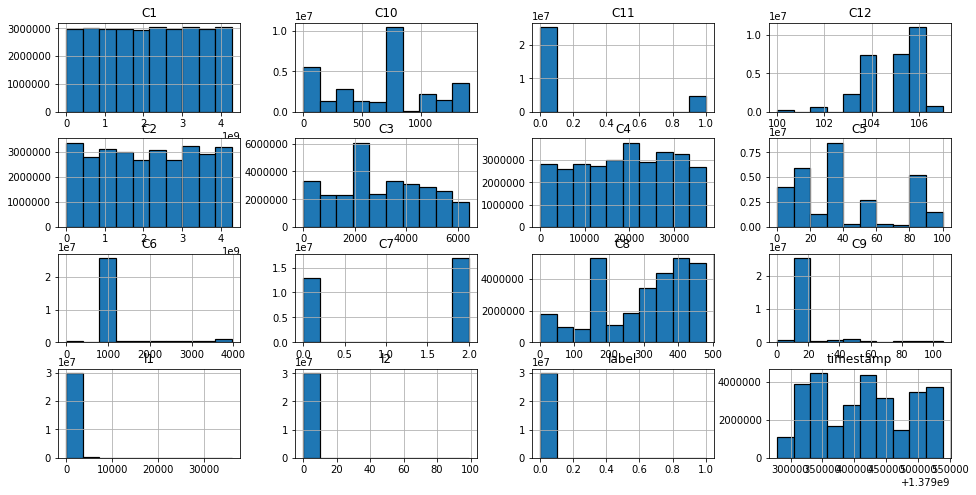

In [9]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.show()

In [10]:
# Корреляционная матрица
corr = data.corr()

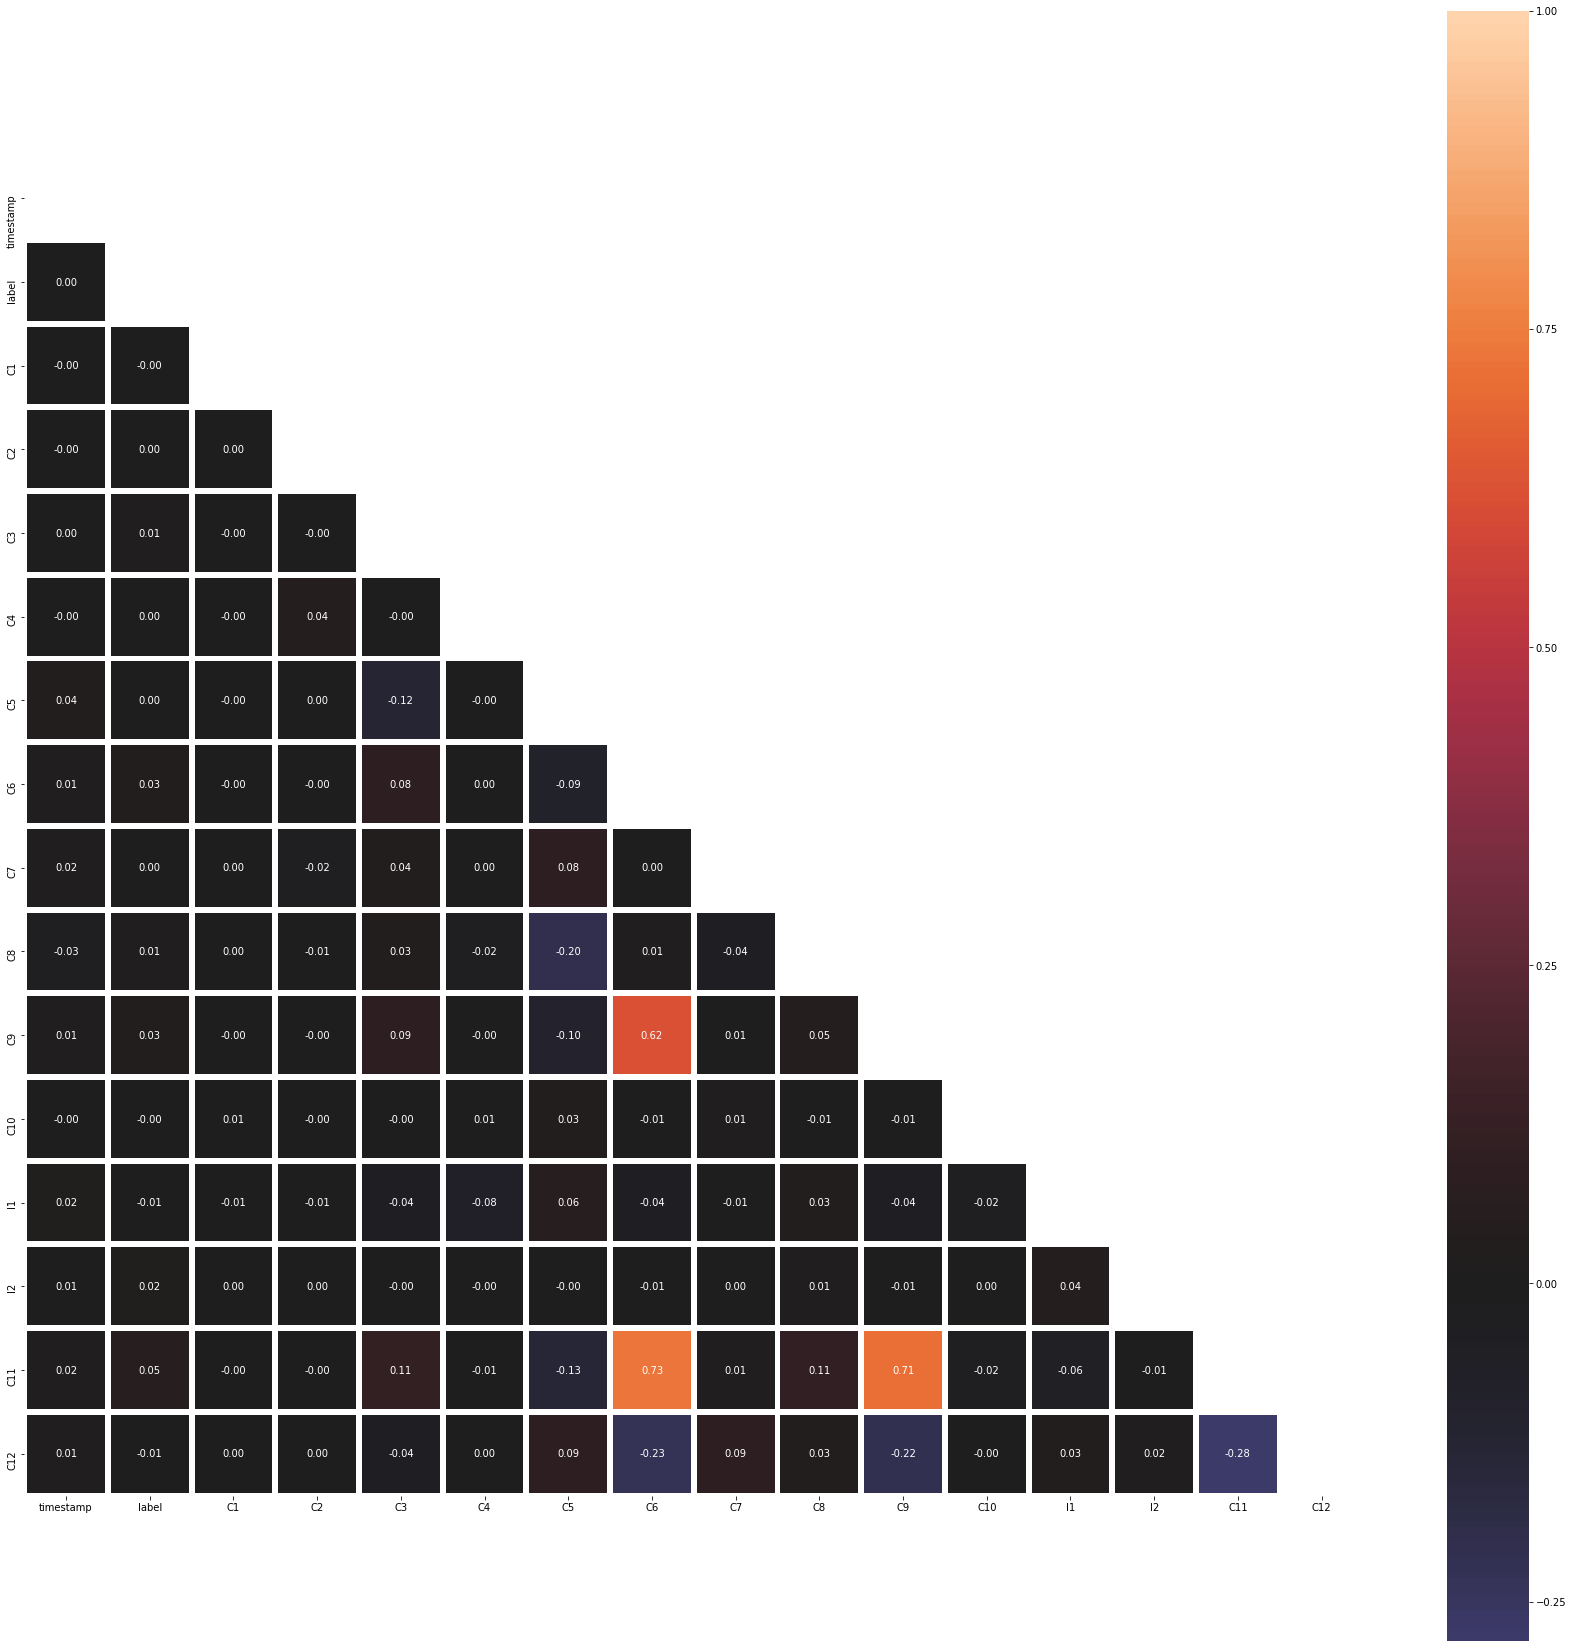

In [11]:
# Визуализация корреляционной матрицы
%config InlineBackend.figure_format = 'png'
plt.figure(figsize=(30,30))
# Создание маски для скрытия верхнего треугольника матрицы корреляции
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f', square=True, linewidths=5);

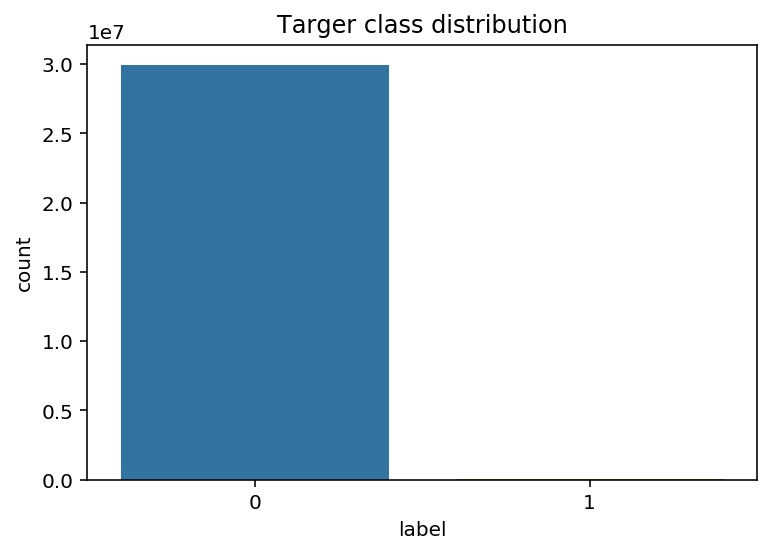

In [12]:
# Распределение значений таргета - параметр 'label'
%config InlineBackend.figure_format = 'retina'
ax = plt.axes()
sns.countplot(x='label', data=data, ax=ax);
ax.set_title('Targer class distribution')
plt.show()

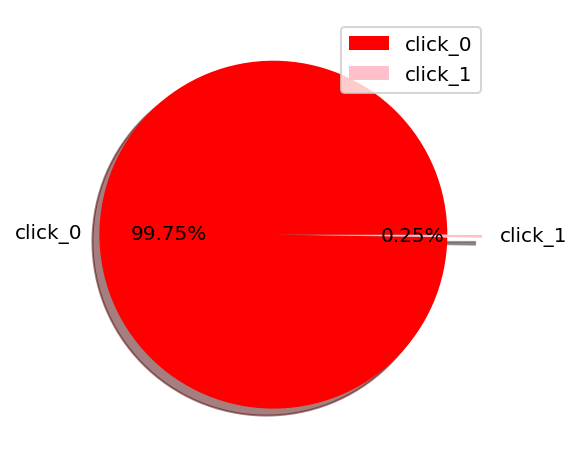

In [13]:
# График pie_chart
size = list(data['label'].value_counts())
colors = ['red', 'pink']
labels = "click_0", "click_1"
explode = [0, 0.2]

plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.legend()
plt.show()

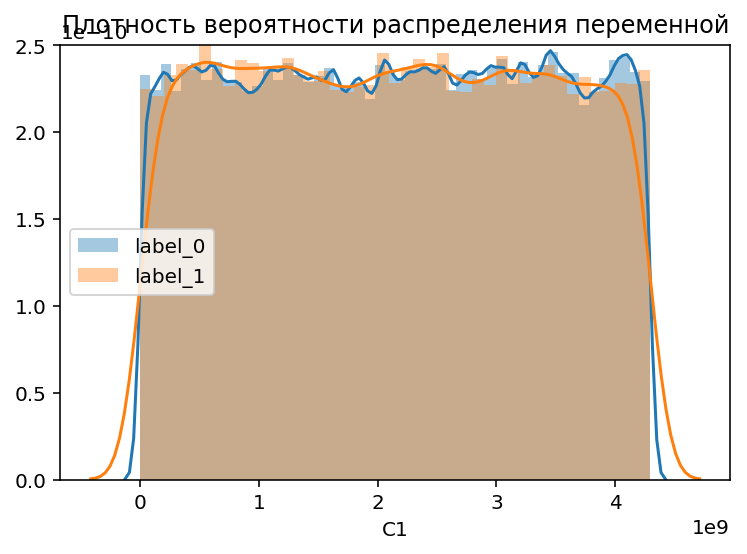

In [14]:
label_0 = data[data['label']==0]['C1']
label_1 = data[data['label']==1]['C1']
sns.distplot(label_0)
sns.distplot(label_1)
plt.title('Плотность вероятности распределения переменной')
plt.legend(['label_0', 'label_1'])
plt.show()

In [15]:
# label совместно 1 и 0.
#fig, ax = plt.subplots(7,3, figsize=(15,20))
#for col, axis in zip(data.select_dtypes(include=[np.number]).columns[1:],[i for i in ax.flat]):
#    data.loc[data['label']==0, data.columns!='label'].hist(column=col, ax=axis, alpha=0.75, color='green', label='label (0)')
#    data.loc[data['label']==1, data.columns!='label'].hist(column=col, ax=axis, alpha=0.75, color='red', label='label (1)')
#    axis.legend(loc="upper right")
#plt.tight_layout()
#plt.show()

In [16]:
#sns.set(style="ticks", color_codes=True)
#i = sns.pairplot(data)

In [17]:
# значения для C1
C10 = data[data['label']==0]['C1']
C11 = data[data['label']==1]['C1']
# значения для C2
C20 = data[data['label']==0]['C2']
C21 = data[data['label']==1]['C2']
# значения для C3
C30 = data[data['label']==0]['C3']
C31 = data[data['label']==1]['C3']
# значения для C4
C40 = data[data['label']==0]['C4']
C41 = data[data['label']==1]['C4']
# значения для C5
C50 = data[data['label']==0]['C5']
C51 = data[data['label']==1]['C5']
# значения для C6
C60 = data[data['label']==0]['C6']
C61 = data[data['label']==1]['C6']
# значения для C7
C70 = data[data['label']==0]['C7']
C71 = data[data['label']==1]['C7']
# значения для C8
C80 = data[data['label']==0]['C8']
C81 = data[data['label']==1]['C8']
# значения для C9
C90 = data[data['label']==0]['C9']
C91 = data[data['label']==1]['C9']
# значения для C10
C100 = data[data['label']==0]['C10']
C101 = data[data['label']==1]['C10']
# значения для CG1
CG10 = data[data['label']==0]['CG1']
CG11 = data[data['label']==1]['CG1']
# значения для CG2
CG20 = data[data['label']==0]['CG2']
CG21 = data[data['label']==1]['CG2']
# значения для CG3
CG30 = data[data['label']==0]['CG3']
CG31 = data[data['label']==1]['CG3']
# значения для L1
l10 = data[data['label']==0]['l1']
l11 = data[data['label']==1]['l1']
# значения для L2
l20 = data[data['label']==0]['l2']
l21 = data[data['label']==1]['l2']
# значения для C11
C110 = data[data['label']==0]['C11']
C111 = data[data['label']==1]['C11']
# значения для C12
C120 = data[data['label']==0]['C12']
C121 = data[data['label']==1]['C12']

# расчет двухвыборочного t-критерия для двух независимых выборок
ttest_C1 = sts.ttest_ind(C10, C11)
ttest_C2 = sts.ttest_ind(C20, C21)
ttest_C3 = sts.ttest_ind(C30, C31)
ttest_C4 = sts.ttest_ind(C40, C41)
ttest_C5 = sts.ttest_ind(C50, C51)
ttest_C6 = sts.ttest_ind(C60, C61)
ttest_C7 = sts.ttest_ind(C70, C71)
ttest_C8 = sts.ttest_ind(C80, C81)
ttest_C9 = sts.ttest_ind(C10, C11)
ttest_C10 = sts.ttest_ind(C20, C21)
ttest_CG1 = sts.ttest_ind(C30, C31)
ttest_CG2 = sts.ttest_ind(C40, C41)
ttest_CG3 = sts.ttest_ind(C50, C51)
ttest_L1 = sts.ttest_ind(l10, l11)
ttest_L2 = sts.ttest_ind(l20, l21)
ttest_C11 = sts.ttest_ind(C110, C111)
ttest_C12 = sts.ttest_ind(C120, C121)

# Печать сравнительных результатов t-test
print("Ttest C1: ", ttest_C1)
print("")
print("Ttest C2: ", ttest_C2)
print("")
print("Ttest C3: ", ttest_C3)
print("")
print("Ttest C4: ", ttest_C4)
print("")
print("Ttest C5: ", ttest_C5)
print("")
print("Ttest C6: ", ttest_C6)
print("")
print("Ttest C7: ", ttest_C7)
print("")
print("Ttest C8: ", ttest_C8)
print("")
print("Ttest C9: ", ttest_C9)
print("")
print("Ttest C10: ", ttest_C10)
print("")
print("Ttest CG1: ", ttest_CG1)
print("")
print("Ttest CG2: ", ttest_CG2)
print("")
print("Ttest CG3: ", ttest_CG3)
print("")
print("Ttest L1: ", ttest_L1)
print("")
print("Ttest L2: ", ttest_L2)
print("")
print("Ttest C11: ", ttest_C11)
print("")
print("Ttest C12: ", ttest_C12)
print("")

Ttest C1:  Ttest_indResult(statistic=2.8327735723875365, pvalue=0.0046146091264707)

Ttest C2:  Ttest_indResult(statistic=-2.5211586715719507, pvalue=0.011696914577533336)

Ttest C3:  Ttest_indResult(statistic=-68.37018967301077, pvalue=0.0)

Ttest C4:  Ttest_indResult(statistic=-2.4069423158025343, pvalue=0.01608671656072159)

Ttest C5:  Ttest_indResult(statistic=-13.421177375763131, pvalue=4.545598522111319e-41)

Ttest C6:  Ttest_indResult(statistic=-174.7368056459311, pvalue=0.0)

Ttest C7:  Ttest_indResult(statistic=-20.97126476095594, pvalue=1.2022506564777776e-97)

Ttest C8:  Ttest_indResult(statistic=-69.66099337481091, pvalue=0.0)

Ttest C9:  Ttest_indResult(statistic=2.8327735723875365, pvalue=0.0046146091264707)

Ttest C10:  Ttest_indResult(statistic=-2.5211586715719507, pvalue=0.011696914577533336)

Ttest CG1:  Ttest_indResult(statistic=-68.37018967301077, pvalue=0.0)

Ttest CG2:  Ttest_indResult(statistic=-2.4069423158025343, pvalue=0.01608671656072159)

Ttest CG3:  Ttest_i

###### Комментарий 
Отличия в распределении выборок (с таргетом 1 и 0) наблюдаются практически во всех переменных. За исключением двух независимых выборок (fractal_dimension_mean, со значением ***target*** 1 и 0, где значение p-value=0.75) все остальные выборки имеют значение p-value намного меньше 0.05, поэтому мы отвергаем нулевую гипотезу и можем сказать, что имеется статистическое различие между выборками по всеми переменными в зависимости от значения ***target***.

Следует также отметить, что в большинстве переменных группы ***worst*** значение p-value гораздо меньше, чем в их аналогах в группе ***mean***. Данное обстоятельство, предположительно, указывает на то, что статистическое различия между аналогичными выборками в группе ***worst*** гораздо сильнее, чем в группе ***mean***.